In [1]:
#| parameters
fiber_folder = "fiber1"

In [2]:

# Injected Parameters
fiber_folder = "Circ_100_noname_1_measurement_2"


In [20]:
from IPython.display import display, Markdown

display(Markdown(f"# Fiber Datasheet for: {fiber_folder}"))

# Fiber Datasheet for: Circ_100_noname_1_measurement_2

In [21]:
from IPython.display import display, Image
import os
import json
import sys

if sys.platform.startswith("linux"):
    BASE_PATH = r"/run/user/1002/gvfs/smb-share:server=srv4.local,share=labshare/raw_data/fibers/Measurements"
elif sys.platform.startswith("win"):
    BASE_PATH = r"\\srv4\labshare\raw_data\fibers\Measurements"

base_path = BASE_PATH
fiber_path = os.path.join(base_path, fiber_folder)
dirlist = os.listdir(fiber_path)



with open(os.path.join(fiber_path, "fiber_data.json")) as f:
    fiber_data = json.load(f)

display(Markdown("## Fiber Data"))
table = f"""
| **Name**        | {fiber_data['fiber_name']}               |
|-----------------------|------------------------------------------|
| **Dimensions [μm]**   | {fiber_data['fiber_dimension']}          |
| **Shape**        | {fiber_data['fiber_shape']}              |
| **Length [m]**       | {fiber_data['fiber_length']}             |
| **Numerical Aperture** | {fiber_data['numerical_aperature']}      |
| **Coating Type**       | {fiber_data['coating_type']}             |
| **Manufacturer**       | {fiber_data['manufacturer']}             |
"""

display(Markdown(table))

**Fiber Data**


| **Name**        | Circ_100_noname_1_measurement_2               |
|-----------------------|------------------------------------------|
| **Dimensions [μm]**   | 100          |
| **Shape**        | circular              |
| **Length [m]**       | 3             |
| **Numerical Aperture** |       |
| **Coating Type**       |              |
| **Manufacturer**       |              |


In [23]:
from IPython.display import display, HTML


if "fiber_polishing" in dirlist:
    display(Markdown("## Polished End-Faces:"))
    polishing_images = os.path.join(fiber_path, "fiber_polishing")
    img_list = os.listdir(polishing_images)
    img_paths = []

    if any("step5" in item for item in img_list):
        img_paths = [os.path.join(polishing_images, i) for i in img_list if "step5" in i]
    else:
        img_paths = [os.path.join(polishing_images, i) for i in img_list if "step4" in i]

    from IPython.display import display, Latex

    latex_str = r"""
    \begin{center}
    \includegraphics[width=0.4\textwidth]{""" + img_paths[0].replace('\\', '/') + r"""}
    \hspace{1cm}
    \includegraphics[width=0.4\textwidth]{""" + img_paths[1].replace('\\', '/') + r"""}
    \end{center}
    """
    
    display(Latex(latex_str))
    display(Markdown(r"\newpage"))

## Polished End-Faces:

<IPython.core.display.Latex object>

\newpage

## FRD Results:

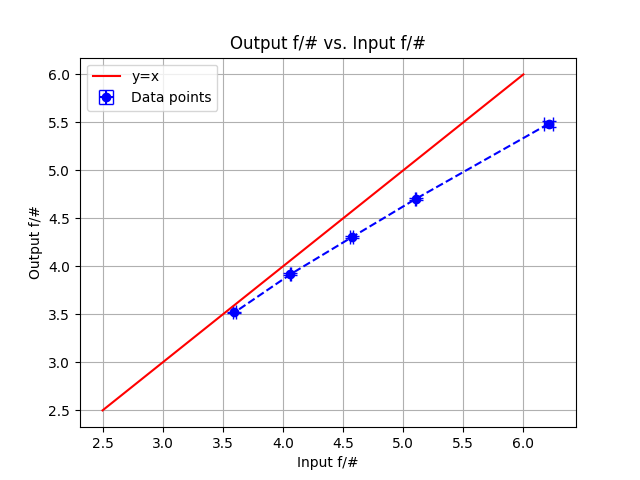

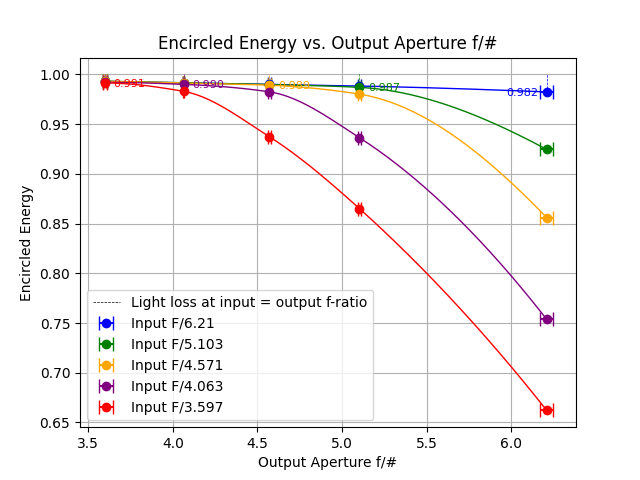

\newpage

In [45]:
if "FRD" in dirlist:
    frd_path = os.path.join(fiber_path, "FRD")
    display(Markdown("## FRD Results:"))
    display(Image(filename=os.path.join(frd_path, "f_number_vs_input.png")))
    display(Image(filename=os.path.join(frd_path, "encircled_energy_vs_output.png")))
    display(Markdown(r"\newpage"))

    

## Scrambling Gain Results:

### Minimum Scrambling Gain: $\:\: SG_{min}$ = 158

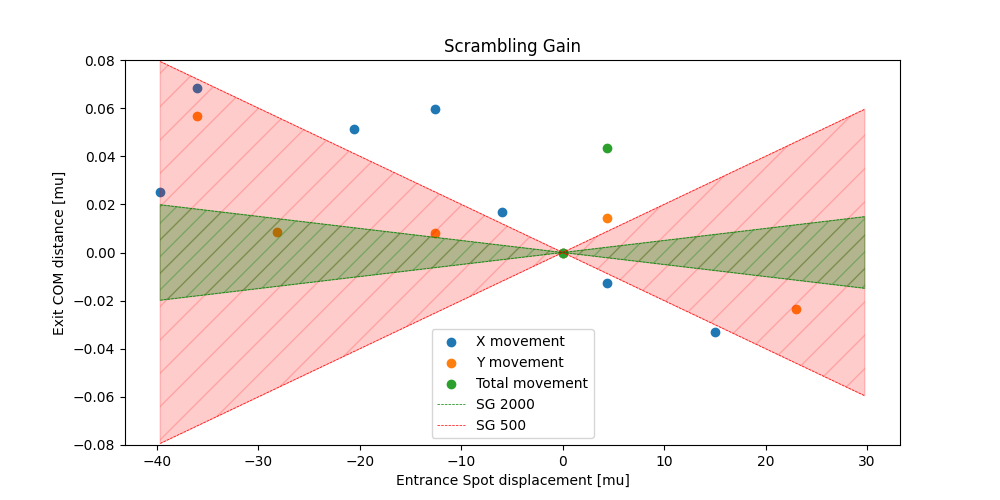

\newpage

In [42]:
if "SG" in dirlist:
    sg_path = os.path.join(fiber_path, "SG")
    sg_plots = os.path.join(sg_path, "plots")
    display(Markdown("## Scrambling Gain Results:"))
    with open(os.path.join(sg_path, "scrambling_gain_new.json")) as f:
        sg_data = json.load(f)
    display(Markdown(f"### Minimum Scrambling Gain: $\:\: SG_{{min}}$ = {sg_data['sg_min']}"))
    display(Image(filename=os.path.join(sg_plots, "scrambling_gain_plot.png")))
    display(Markdown(r"\newpage"))

## Throughput Results:

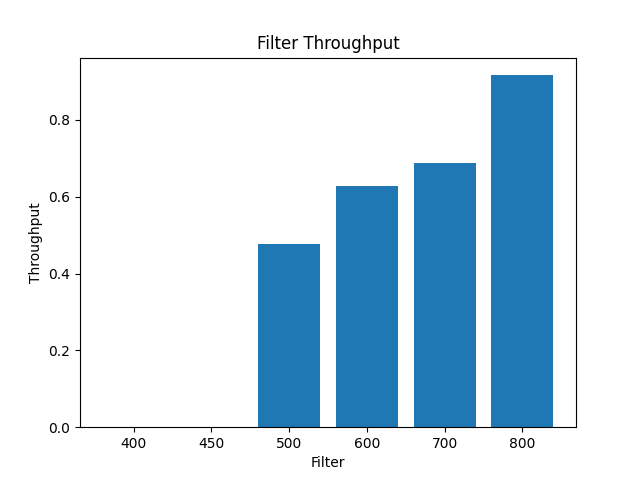

In [35]:
if "Throughput" in dirlist:
    tp_path = os.path.join(fiber_path, "Throughput")
    display(Markdown("## Throughput Results:"))
    display(Image(filename=os.path.join(tp_path, "throughput.png")))